In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys    
import os
path_to_module = '/content/drive/MyDrive/'
sys.path.append(path_to_module)
os.chdir(path_to_module)

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
diamonds = pd.read_csv('./diamonds.csv')

In [ ]:
cut_num = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
for row in range(len(diamonds)):
  diamonds['cut'][row] = cut_num[diamonds['cut'][row]]
for row in range(len(diamonds)):
  diamonds['color'][row] = 75 - ord(diamonds['color'][row]) #J:1,..D:7
clarity_num = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}
for row in range(len(diamonds)):
  diamonds['clarity'][row] = clarity_num[diamonds['clarity'][row]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
diamond_data = diamonds.to_numpy()[:, 1:].astype('float')

# Q1

In [ ]:
#normalize data
idx = [0, 4, 5, 6, 7, 8, 9]
diamond_data[:, idx] = (diamond_data[:, idx] - np.mean(diamond_data[:, idx], axis=0)) / np.std(diamond_data[:, idx], axis=0)

# Q2

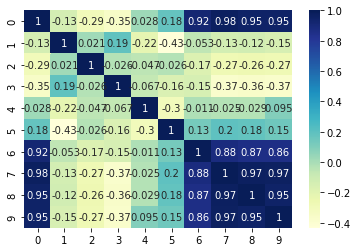

In [ ]:
import seaborn as sb
corr = np.corrcoef(diamond_data.T)
dataplot = sb.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

From the figure above, we can see that the price is relative to carat, x, y, and z. At the same time, we can see x, y, z, and carat are also highly relativeness, which makes sense since the size and the weight are proportional.

# Q3

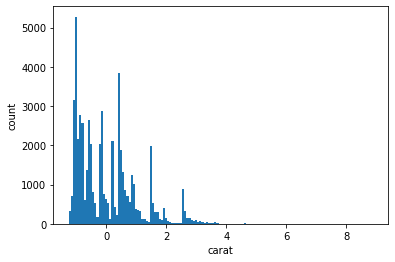

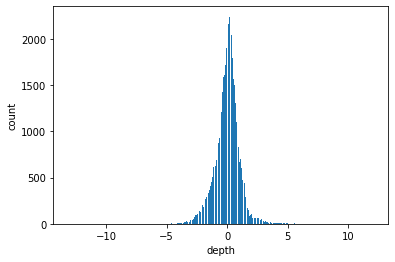

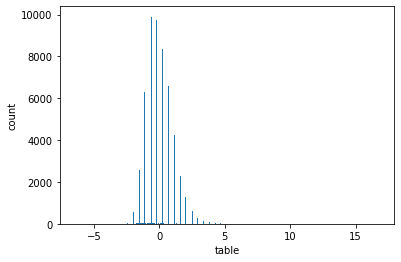

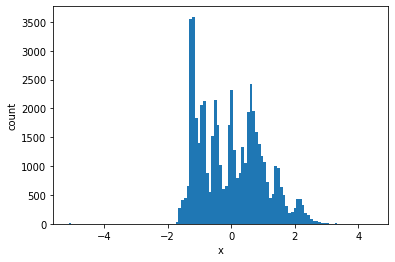

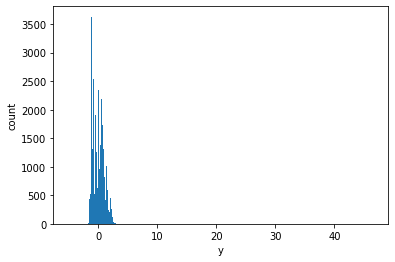

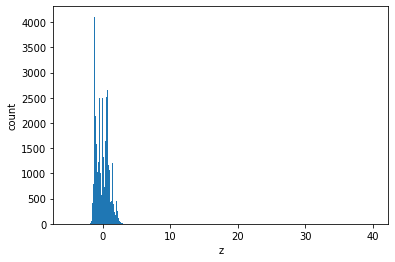

In [ ]:
features = list(diamonds.columns)[1:]
for i in [0, 4, 5, 7, 8, 9]:
  plt.hist(diamond_data[:, i], bins='auto')
  plt.xlabel(features[i])
  plt.ylabel('count')
  plt.show()

There are some methods for dealing with skew data. For instance, we can do log transformation, remove outliers, square root or Box Cox transformation.

# Q4

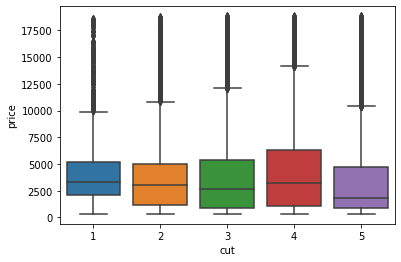

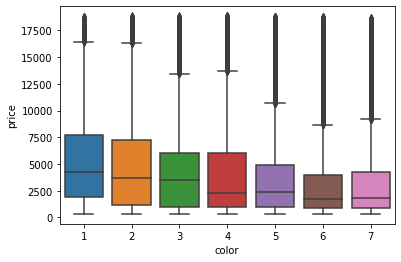

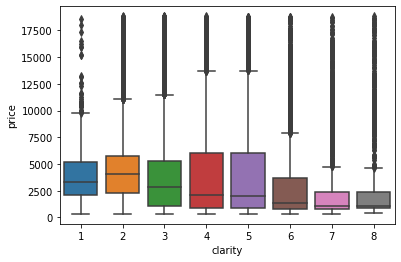

In [ ]:
for f in ['cut', 'color', 'clarity']:
  ax = sb.boxplot(x=f, y="price", data=diamonds)
  plt.show()

For the figure above, we can see that these features are not much relative to prices. We can also observe that from the heapmap about correlation by Q2.

# Q5

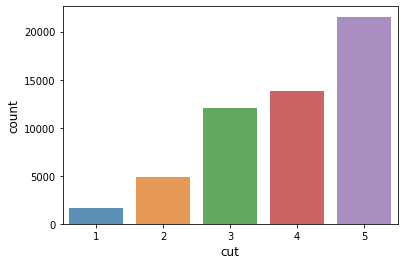

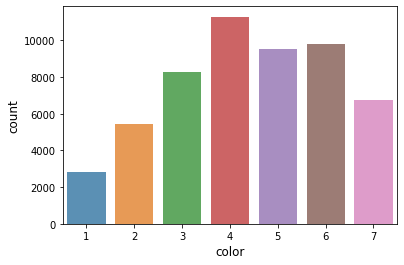

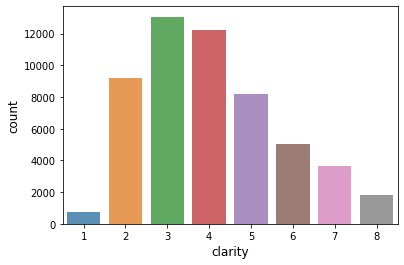

In [ ]:
for f in ['cut', 'color', 'clarity']:
  histogram=sb.barplot(x=diamonds[f].value_counts().index, y=diamonds[f].value_counts().values, alpha=0.8)
  plt.ylabel('count', fontsize=12)
  plt.xlabel(f, fontsize=12)
  plt.show()

# Q7

In [ ]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression
ind = [i for i in range(10)]
ind.remove(6)
print('mutual_info_regression:{}'.format(mutual_info_regression(diamond_data[:, ind], diamond_data[:, 6])))
print('F-scores:{}'.format(f_regression(diamond_data[:, ind], diamond_data[:, 6])[0]))

mutual_info_regression:[1.65217134 0.05764221 0.138603   0.21460453 0.03173889 0.03447966
 1.41298153 1.42125432 1.36028551]
F-scores:[3.04051487e+05 1.54784468e+02 1.65440124e+03 1.18800706e+03
 6.11586346e+00 8.86119363e+02 1.93741523e+05 1.60915662e+05
 1.54923267e+05]


In [ ]:
#feature extraction
from sklearn.model_selection import train_test_split
diamond_x = diamond_data[:, [0,7,8,9]]
diamond_y = diamond_data[:, 6]
diamond_x_train, diamond_x_test, diamond_y_train, diamond_y_test = train_test_split(diamond_x, diamond_y, test_size=0.2, random_state=42)


The rmse may decrease if we remove unimportant features since we can reduce overfitting risk.

# Q8

linear : $\min\limits_{w}||xw-y||_{2}^{2}$

ridge : $\min\limits_{w}||xw-y||_{2}^{2}+\alpha||w||_{2}^{2}$

lasso : $\min\limits_{w}||xw-y||_{2}^{2}+\alpha||w||_{1}$

For ridge regression, the solution is more stable and the output is non-sparse. And ridge regression has analytical solution. As for lasso regression, the output could be sparse, that is to say, some features don't have influence on the model. 

# Q9

In [ ]:
#linear regression without regularization
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

lrg = LinearRegression().fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(lrg.predict(diamond_x_test), diamond_y_test)
print('rmse for linear regression without regularization={}'.format(err**0.5))

rmse for linear regression without regularization=0.38146412821849784


In [ ]:
#Ridge regression
reg = {'alpha':[10**i for i in range(-5, 6)]}
rid = Ridge()
clf = GridSearchCV(estimator=rid, param_grid=reg, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf.fit(diamond_x_train, diamond_y_train)

print("Best Parameters: "+str(clf.best_params_))
rid = Ridge(alpha=clf.best_params_['alpha']).fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(rid.predict(diamond_x_test), diamond_y_test)
print('rmse for linear regression with ridge regularization={}'.format(err**0.5))

Best Parameters: {'alpha': 100}
rmse for linear regression with ridge regularization=0.38184414037141706


In [ ]:
las = Lasso()
clf = GridSearchCV(estimator=las, param_grid=reg, cv=10, scoring='neg_root_mean_squared_error', n_jobs=-1)
clf.fit(diamond_x_train, diamond_y_train)

print("Best Parameters: "+str(clf.best_params_))
las = Lasso(alpha=clf.best_params_['alpha']).fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(las.predict(diamond_x_test), diamond_y_test)
print('rmse for linear regression with Lasso regularization={}'.format(err**0.5))

Best Parameters: {'alpha': 0.001}
rmse for linear regression with Lasso regularization=0.38193470320410033


# Q10

If we don't apply regularization, then feature scaling would not influence the outcome. It would just influence on the weight of the model, but the optimization solution is the same. However, feature scaling makes influence on models with regularization. Because the weight term is in the objective function, we may sacrifice the bias to make weight smaller.

# Q11

In [ ]:
print('p-value:{}'.format(f_regression(diamond_data[:, ind], diamond_data[:, 6])[1]))

p-value:[0.00000000e+000 1.74601933e-035 0.00000000e+000 1.57172076e-257
 1.34004530e-002 3.76996315e-193 0.00000000e+000 0.00000000e+000
 0.00000000e+000]


While p-value is smaller, which means this feature is more important. P-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct. 

# Q12

By heatmap of correlation, the most salient feature is the carat. That makes sense since the price usually depends on the weight of the diamond.

# Q13

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('clf', None),
]
)

param_grid = [{
        "poly__degree":[i for i in range(1, 7)],
        "clf__alpha":[0] + [10**i for i in range(-5, 6)],
        "clf":(
            Ridge(fit_intercept=False),
            Lasso(fit_intercept=False),
        ),
    }]

In [ ]:
cv = GridSearchCV(pipeline,cv=10,param_grid=param_grid,scoring='neg_root_mean_squared_error', n_jobs=-1)
cv.fit(diamond_x_train, diamond_y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('clf', None)]),
             n_jobs=-1,
             param_grid=[{'clf': (Ridge(fit_intercept=False),
                                  Lasso(alpha=0.001, fit_intercept=False)),
                          'clf__alpha': [0, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                         10, 100, 1000, 10000, 100000],
                          'poly__degree': [1, 2, 3, 4, 5, 6]}],
             scoring='neg_root_mean_squared_error')

In [ ]:
print(cv.best_params_)

{'clf': Lasso(alpha=0.001, fit_intercept=False), 'clf__alpha': 0.001, 'poly__degree': 1}


The best model is when degree is 1 and with Lasso regularization and parameter is 0.001.

Increasing the degree means the hypothesis set becomes larger, so we can fit training set better. However, this also increases the risk of overfitting and make performance on test set is bad.

Therefore, we can view the degree as a hyperparameter, and choose by cross validation.

# Q14

In [ ]:
lrg = LinearRegression().fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(lrg.predict(diamond_x_test), diamond_y_test)
print('rmse for linear regression with original feature={}'.format(err**0.5))

poly = PolynomialFeatures(2, interaction_only=True)
diamond_x_train_poly = poly.fit_transform(diamond_x_train)
diamond_x_test_poly = poly.fit_transform(diamond_x_test)
lrg = LinearRegression(fit_intercept=False).fit(diamond_x_train_poly, diamond_y_train)
err = mean_squared_error(lrg.predict(diamond_x_test_poly), diamond_y_test)
print('rmse for linear regression with features x_1*x_2={}'.format(err**0.5))

rmse for linear regression with original feature=0.38146412821849784
rmse for linear regression with features x_1*x_2=0.36508788894317895


The error decreases after we apply features $x_{1}x_{2}$. The reason is both features are proportional to the target and add these features could help us have more useful dimensions. At the same time, the number of features won't be too much and leads to overfitting.

# Q15

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor().fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(mlp.predict(diamond_x_test), diamond_y_test)
print('rmse for multi-layer perceptron={}'.format(err**0.5))

rmse for multi-layer perceptron=0.3396707136884523


**Why does it do much better than linear regression?** For linear regression, rmse values were observed to be approximately 0.38 for all regularization schemes. However, rmse from MLP is observed to be a smaller value of 0.34, and this is due to the non-linear relationship between the predictors and the outcome. Neural networks such as MLP will outperform linear regression in a complex dataset since it has multiple layers and conducts back propagation to deal with non-linearities.

# Q16

In [ ]:
param_mlp = {'hidden_layer_sizes': [(100,),(200,200),(300,300,300),(300,300,200,100),(400,400,400,400)],
          'alpha': [10**i for i in range(-5, -2)], #weight decay
          }

mlp = MLPRegressor(early_stopping=True)
clf = GridSearchCV(estimator=mlp, param_grid=param_mlp, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=3)
clf.fit(diamond_x_train, diamond_y_train)

print("Best Parameters: "+str(clf.best_params_))
mlp = MLPRegressor(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], alpha=clf.best_params_['alpha']).fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(mlp.predict(diamond_x_test), diamond_y_test)
print('rmse for multi-layer perceptron={}'.format(err**0.5))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (400, 400, 400, 400)}
rmse for multi-layer perceptron=0.33722512793402576


Best Parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (400, 400, 400, 400)}

rmse for multi-layer perceptron=0.33722512793402576

# Q17

In [ ]:
param_mlp = {'hidden_layer_sizes': [(400,400,400,400)],
          'activation': ['identity','relu','tanh','logistic'],
          'alpha': [0.0001], #weight decay
          }

mlp = MLPRegressor(early_stopping=True)
clf = GridSearchCV(estimator=mlp, param_grid=param_mlp, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=10)
clf.fit(diamond_x_train, diamond_y_train)

print("Best Parameters: "+str(clf.best_params_))
mlp = MLPRegressor(hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], activation=clf.best_params_['activation'], alpha=clf.best_params_['alpha']).fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(mlp.predict(diamond_x_test), diamond_y_test)
print('rmse for multi-layer perceptron={}'.format(err**0.5))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (400, 400, 400, 400)}
rmse for multi-layer perceptron=0.33971334661540203


**What activation function should be used for the output?** From above, "ReLU" is the best activation function.

Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (400, 400, 400, 400)}

rmse for multi-layer perceptron=0.33971334661540203

# Q18

**What is the risk of increasing the depth of the network too far?** Increasing depth of the network means increasing the number of parameters and therefore, may cause overfitting on training data and accuracy on test data may decrease.

# Q19

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_rfr = {"max_depth": [2,4,8,16, None],
            "n_estimators":[50,100,200,300,400,500],
            "max_features": [0.1, 0.25, 0.5, 0.75, 1.0],}

rfr = RandomForestRegressor()
clf = GridSearchCV(estimator=rfr, param_grid=param_rfr, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=10)
clf.fit(diamond_x_train, diamond_y_train)

print("Best Parameters: "+str(clf.best_params_))
rfr = RandomForestRegressor(max_depth=clf.best_params_['max_depth'], n_estimators=clf.best_params_['n_estimators'], max_features=clf.best_params_['max_features']).fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(rfr.predict(diamond_x_test), diamond_y_test)
print('rmse for Random Forest Regressor={}'.format(err**0.5))

Fitting 3 folds for each of 150 candidates, totalling 450 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best Parameters: {'max_depth': 8, 'max_features': 0.75, 'n_estimators': 200}
rmse for multi-layer perceptron=0.33867940390322027


Best Parameters: {'max_depth': 8, 'max_features': 0.75, 'n_estimators': 200}

rmse for multi-layer perceptron=0.33867940390322027

**Explain how these hyper-parameters affect the overall performance?**
***max_depth*** - The overall performance as measured by the RMSE seems to plateau when maximum depth=8-12 with a RMSE score of 0.337-0.338. Both increasing or decreasing the depth has implications of increasing the RMSE score as well.
***max_features*** - The impact of altering the maximum features on the RMSE score is less compared to the other hyperparameters. The best is at 75% of n_features however, changing this value has small impact.
***n_estimators*** - The impact of altering the number of estimators is also less compared to that of the maximum depth. When the classification is conducted with the best parameters as discovered above but with n_estimators altered to "5", the obtained RMSE score is 0.343. However, when n_estimators=100, the RMSE is 0.336 and when n_estimators=100, RMSE is also 0.336 and therefore it is observed that changing the n_estimators will not have much significance unless it takes a very small value. 
**Do some of them have regularization effect?**
In overall, max_depth has a regularization effect since it is able to tune the complexity of the tree and adjust between under-fitting and over-fitting. 

# Q20

**Why does random forest perform well?** Random forest performs well with this dataset because high dimensional structured datasets with variables that individually contribute to prediction work better with random forest and they can also reduce the risks of overfitting.

# Q21

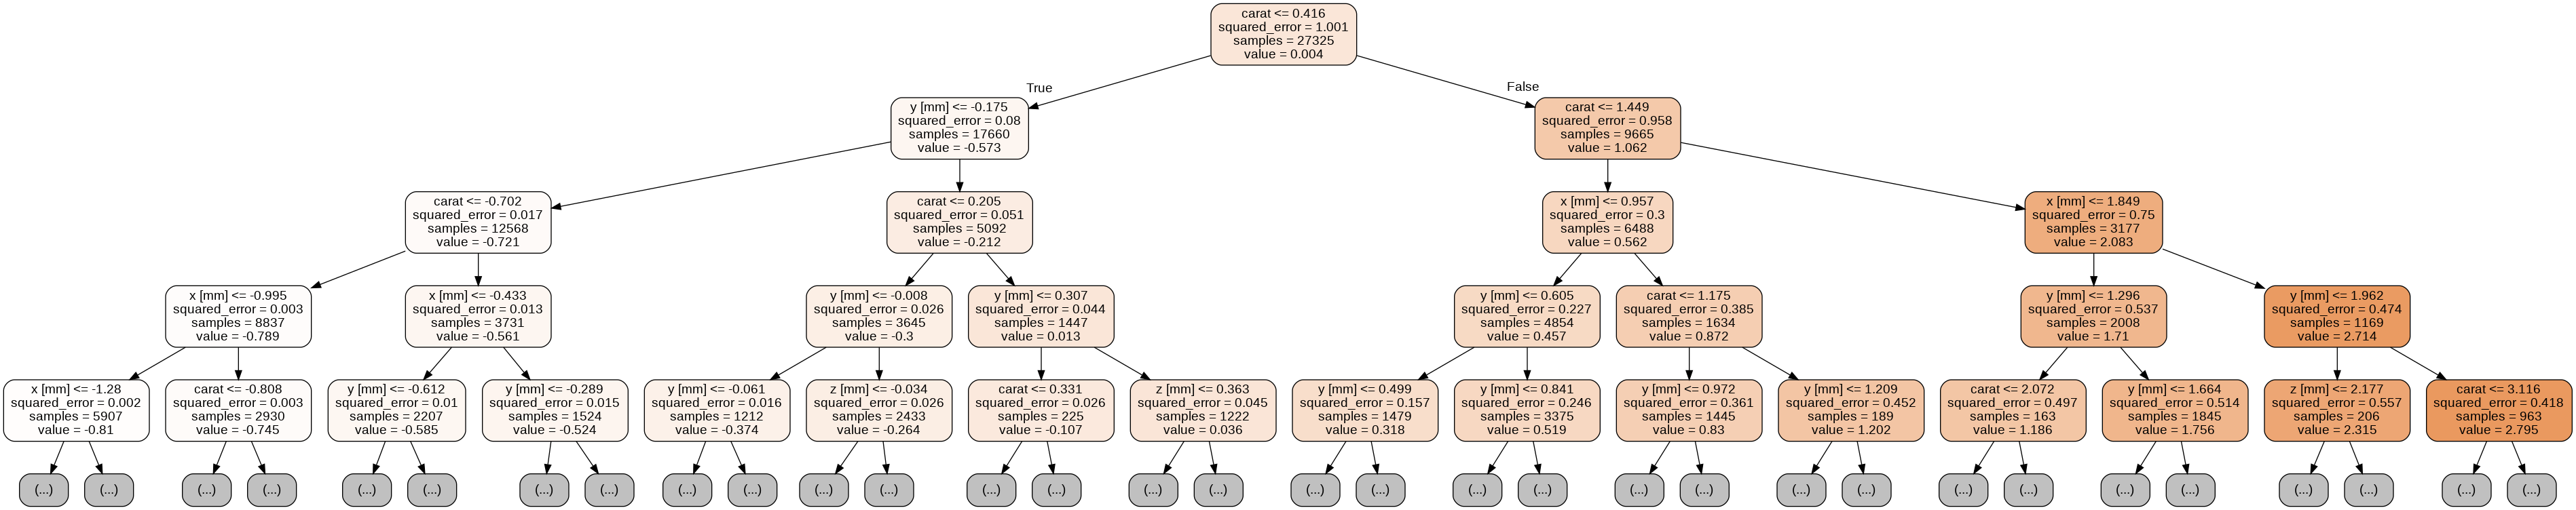

In [ ]:
from sklearn.tree import export_graphviz

estimator = rfr.estimators_[0]
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = ["carat", "x [mm]", "y [mm]" ,"z [mm]"],
                rounded = True, proportion = False, 
                max_depth = 4,
                filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png'])

from IPython.display import Image
Image(filename = 'tree.png')

**Which feature is selected for branching at the root node?** At the root node, "carat" is selected as the branching feature.

**What can you infer about the importance of features?** While the feature at the root node is "carat," at depth 1 the selected features are 'y [mm]' and 'carat.' Furthermore, at depth 2 'x [mm]' and 'carat' is observed, and at depth 3, 'x[mm]', 'y[mm]', and 'carrat' is observed. The feature 'z [mm]' does not appear until depth 4 and therefore one could infer that 'carat' is the most salient feature which distinguishes the price of diamonds, with its proportions in the x and y dimensions being next, and z being the most undistinguishing feature of all. 

# Q22

In [ ]:
#LightGBM
!pip install lightgbm
import lightgbm as lgb

lgbm = lgb.LGBMRegressor()
param_lgbm = {
    'max_depth': [2,4,8,16],
    'num_leaves': [2,4,8,16,32,64,128],
    "n_estimators":[10,50,100,200,300,400,500],

}

clf = GridSearchCV(estimator=lgbm, param_grid=param_lgbm, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=3, refit=True)
clf.fit(diamond_x_train, diamond_y_train)

print("Best Parameters: "+str(clf.best_params_))
lgbm = lgb.LGBMRegressor(max_depth=clf.best_params_['max_depth'], num_leaves=clf.best_params_['num_leaves'], n_estimators=clf.best_params_['n_estimators']).fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(lgbm.predict(diamond_x_test), diamond_y_test)
print('rmse for LightGBM Regressor={}'.format(err**0.5))

KeyboardInterrupt: ignored

Best Parameters: {'max_depth': 8, 'n_estimators': 50, 'num_leaves': 32}

rmse for multi-layer perceptron=0.3384697445278097

In [ ]:
#CatBoost
!pip install catboost
from catboost import CatBoostRegressor

ctb = CatBoostRegressor(thread_count=-1)
param_ctb = {
    'depth': [6,8,10],
    'l2_leaf_reg': [1,2,4],
    'random_strength':[0,1,2],
    'learning_rate': [0.01,0.03,0.1]

}

clf = GridSearchCV(estimator=ctb, param_grid=param_ctb, cv=3, scoring='neg_root_mean_squared_error')
clf.fit(diamond_x_train, diamond_y_train)

print("Best Parameters: "+str(clf.best_params_))
ctb = CatBoostRegressor(depth=clf.best_params_['depth'], l2_leaf_reg=clf.best_params_['l2_leaf_reg'], random_strength=clf.best_params_['random_strength'],learning_rate=clf.best_params_['learning_rate']).fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(ctb.predict(diamond_x_test), diamond_y_test)
print('rmse for CatBoost Regressor={}'.format(err**0.5))

Best Parameters: {'depth': 10, 'l2_leaf_reg': 4, 'learning_rate': 0.03, 'random_strength': 2}

rmse for CatBoost Regressor=0.33763716231667684

# Q23

In [ ]:
#LightGBM
!pip install scikit-optimize
from skopt import BayesSearchCV
light = lgb.LGBMRegressor()
param_light = {
    'max_depth': [2,4,8,16],
    'num_leaves': [2,4,8,16,32,64,128],
    "n_estimators":[25,50,100,200,300,400,500],

}

clf = BayesSearchCV(estimator=light, search_spaces=param_light, cv=2, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=3, refit=True)
clf.fit(diamond_x_train, diamond_y_train)

print("Best Parameters: "+str(clf.best_params_))
light = lgb.LGBMRegressor(max_depth=clf.best_params_['max_depth'], num_leaves=clf.best_params_['num_leaves'], n_estimators=clf.best_params_['n_estimators']).fit(diamond_x_train, diamond_y_train)
y_pred_test=light.predict(diamond_x_test)
RMSE = np.sqrt(mean_squared_error(y_pred_test, diamond_y_test))
print('rmse for LightGBM Regressor={}'.format(RMSE))

Best Parameters: [('max_depth', 8), ('n_estimators', 100), ('num_leaves', 32)]

rmse for LightGBM Regressor=0.3382200723070511

In [ ]:
#CatBoost
ctb = CatBoostRegressor(thread_count=-1)
param_ctb = {
    'depth': [6,8,10],
    'l2_leaf_reg': [1,2,4],
    'random_strength':[0,1,2],
    'learning_rate': [0.01,0.03,0.1]

}

clf = BayesSearchCV(estimator=ctb, search_spaces=param_ctb, cv=3, scoring='neg_root_mean_squared_error')
clf.fit(diamond_x_train, diamond_y_train)

print("Best Parameters: "+str(clf.best_params_))
ctb = CatBoostRegressor(depth=clf.best_params_['depth'], l2_leaf_reg=clf.best_params_['l2_leaf_reg'], random_strength=clf.best_params_['random_strength'],learning_rate=clf.best_params_['learning_rate']).fit(diamond_x_train, diamond_y_train)
err = mean_squared_error(ctb.predict(diamond_x_test), diamond_y_test)
print('rmse for CatBoost Regressor={}'.format(err**0.5))

Best Parameters: [('depth', 8), ('l2_leaf_reg', 4), ('learning_rate', 0.03), ('random_strength', 1)]

rmse for CatBoost Regressor=0.3383022980011272

# Q24

Comparing different parameter effects

In [ ]:
light = lgb.LGBMRegressor(max_depth=2, n_estimators=100, num_leaves=32).fit(diamond_x_train, diamond_y_train)
y_pred_test=light.predict(diamond_x_test)
RMSE = np.sqrt(mean_squared_error(y_pred_test, diamond_y_test))
print('rmse for LightGBM Regressor={}'.format(RMSE))

rmse for LightGBM Regressor=0.3443026547285279


In [ ]:
light = lgb.LGBMRegressor(max_depth=8, n_estimators=100, num_leaves=32).fit(diamond_x_train, diamond_y_train)
y_pred_test=light.predict(diamond_x_test)
RMSE = np.sqrt(mean_squared_error(y_pred_test, diamond_y_test))
print('rmse for LightGBM Regressor={}'.format(RMSE))

rmse for LightGBM Regressor=0.3382200723070511


In [ ]:
light = lgb.LGBMRegressor(max_depth=8, n_estimators=50, num_leaves=32).fit(diamond_x_train, diamond_y_train)
y_pred_test=light.predict(diamond_x_test)
RMSE = np.sqrt(mean_squared_error(y_pred_test, diamond_y_test))
print('rmse for LightGBM Regressor={}'.format(RMSE))

rmse for LightGBM Regressor=0.3384697445278097


In [ ]:
light = lgb.LGBMRegressor(max_depth=8, n_estimators=10, num_leaves=32).fit(diamond_x_train, diamond_y_train)
y_pred_test=light.predict(diamond_x_test)
RMSE = np.sqrt(mean_squared_error(y_pred_test, diamond_y_test))
print('rmse for LightGBM Regressor={}'.format(RMSE))

rmse for LightGBM Regressor=0.47040280093326436


In [ ]:
light = lgb.LGBMRegressor(max_depth=8, n_estimators=100, num_leaves=4).fit(diamond_x_train, diamond_y_train)
y_pred_test=light.predict(diamond_x_test)
RMSE = np.sqrt(mean_squared_error(y_pred_test, diamond_y_test))
print('rmse for LightGBM Regressor={}'.format(RMSE))

rmse for LightGBM Regressor=0.3440970935755289


**Which of them helps with performance?** There is subtle difference in the RMSE scores with LightGBM being 0.33822 and CatBoost being 0.33830. However, LightGBM is slightly better. In terms of hyperparameters, optimizing n_estimators has the most significant effect.

**Which helps with regularization (shrinks the generalization gap)?** LightGBM seems to be doing better with the generalization gap (as seen in Q25 below) the RMSE for training set for LightGBM is 0.3294786348038795 and for validation set, 0.34149909705262727. Thus, the difference is merely 0.012. On the contrast, CatBoost training set is 0.31499329017072764 and validation set is 0.3408280489012143, which makes the difference 0.026 and almost the twice of LightGBM. 

**Which affects the fitting efficiency?**

Additionally, the runtime of CatBoost is orders of magnitudes larger than LightGBM however, its performance on categorical data is better since it works on smaller subsets to reduce overfitting. On the other hand, LightGBM is much faster and can handle a large dataset but requires data to be pre-processed and is prone to overfitting.

# Q25

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from numpy import absolute
from numpy import mean
from numpy import sqrt 

kf = KFold(n_splits=10, random_state=1, shuffle=True)

In [ ]:
# Linear Regression
lrg = LinearRegression()
scores = cross_validate(lrg, diamond_x_train, diamond_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for Linear Regression train set={}'.format(train_rmse))
print('rmse for Linear Regression validation set={}'.format(test_rmse))

rmse for Linear Regression train set=0.3820919523598028
rmse for Linear Regression validation set=0.38482808422746334


In [ ]:
# Polynomial Regression
poly = PolynomialFeatures(degree=1)
diamond_x_train_poly = poly.fit_transform(diamond_x_train)
diamond_x_test_poly = poly.fit_transform(diamond_x_test)
lrg = Lasso(alpha=0.001, fit_intercept=False).fit(diamond_x_train_poly, diamond_y_train)
scores = cross_validate(lrg, diamond_x_train_poly, diamond_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for Polynomial Regression train set={}'.format(train_rmse))
print('rmse for Polynomial Regression validation set={}'.format(test_rmse))

rmse for Polynomial Regression train set=0.3822987133542557
rmse for Polynomial Regression validation set=0.3839580364498527


In [ ]:
# Neural Network
mlp = MLPRegressor(early_stopping=True, activation='relu', alpha=0.0001, hidden_layer_sizes=(400,400,400,400))
scores = cross_validate(mlp, diamond_x_train, diamond_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for Neural Network train set={}'.format(train_rmse))
print('rmse for Neural Network validation set={}'.format(test_rmse))

rmse for Random Forest Regressor train set=0.3458847193914507
rmse for Random Forest Regressor validation set=0.3477865034834301


In [ ]:
# Random Forest
rfr = RandomForestRegressor(max_depth=8, max_features=0.75, n_estimators=200, oob_score=True, warm_start=True)
scores = cross_validate(rfr, diamond_x_train, diamond_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True, return_estimator=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for Random Forest Regressor train set={}'.format(train_rmse))
print('rmse for Random Forest Regressor validation set={}'.format(test_rmse))

rmse for Random Forest Regressor train set=0.3293121712291798
rmse for Random Forest Regressor validation set=0.3417309236664362


In [ ]:
oob_error = 1-np.mean([i.oob_score_ for i in scores['estimator']])
print('Out of Bag Error={}'.format(oob_error))

Out of Bag Error=0.11679711928542724


In [ ]:
# LightGBM
lgbm = lgb.LGBMRegressor(max_depth=8, num_leaves=32, n_estimators=50)
scores = cross_validate(lgbm, diamond_x_train, diamond_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for LightGBM train set={}'.format(train_rmse))
print('rmse for LightGBM validation set={}'.format(test_rmse))

rmse for LightGBM train set=0.3294786348038795
rmse for LightGBM validation set=0.34149909705262727


In [ ]:
# CatBoost
ctb = CatBoostRegressor(thread_count=-1, depth=10, l2_leaf_reg=4, learning_rate=0.03, random_strength=2)
scores = cross_validate(ctb, diamond_x_train, diamond_y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1, return_train_score=True)
train_rmse = mean(absolute(scores['train_score']))
test_rmse = mean(absolute(scores['test_score']))
print('rmse for CatBoost train set={}'.format(train_rmse))
print('rmse for CatBoost validation set={}'.format(test_rmse))

rmse for CatBoost train set=0.31499329017072764
rmse for CatBoost validation set=0.3408280489012143


**Why is the training RMSE different from that of validation set?**
The regression model is designed to fit the dataset and therefore the model is created in order to minimize the training RMSE as where the test RMSE is the result of fitting the model using the training set. Therefore, the training RMSE can be much smaller than the test RMSE, which would indicate overfitting.

# Q26

From Q25, Out of Bag Error=0.11679711928542724. 

**Explain what OOB error and R2 score means.**
Out of Bag Error measures the averaged prediction error for random forests calculated using tree predictions that don't contain a training sample in their bootstrap sample. The R2 score is the regression score function between the predicted and target sets. 